# 一、导入数据

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_excel("input/data_.xlsx",index_col=0)

In [3]:
data_ = data.copy()
data_

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Thickness_classnum,Cell Size _small,Cell Size _medium,Cell Size _big,Thickness_class,Cell Size
ID,,,,,,,,,,,,,,,,
1275807,4,2,4,3,2,2,2,1,1,2,2,1,0,0,medium,small
1193683,1,1,2,1,3,1,1,1,1,2,1,1,0,0,thin,small
1170419,10,10,10,8,2,10,4,1,1,4,3,0,0,1,thick,big
1190386,4,6,6,5,7,6,7,7,3,4,2,0,1,0,medium,medium
1202125,4,1,1,1,2,1,3,1,1,2,2,1,0,0,medium,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493452,1,1,3,1,2,1,1,1,1,2,1,1,0,0,thin,small
1116132,6,3,4,1,5,2,3,9,1,4,2,1,0,0,medium,small
1133136,3,1,1,1,2,3,3,1,1,2,1,1,0,0,thin,small


In [4]:
data_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645 entries, 1275807 to 1206314
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              645 non-null    int64 
 1   Uniformity of Cell Size      645 non-null    int64 
 2   Uniformity of Cell Shape     645 non-null    int64 
 3   Marginal Adhesion            645 non-null    int64 
 4   Single Epithelial Cell Size  645 non-null    int64 
 5   Bare Nuclei                  645 non-null    int64 
 6   Bland Chromatin              645 non-null    int64 
 7   Normal Nucleoli              645 non-null    int64 
 8   Mitoses                      645 non-null    int64 
 9   Class                        645 non-null    int64 
 10  Thickness_classnum           645 non-null    int64 
 11  Cell Size _small             645 non-null    int64 
 12  Cell Size _medium            645 non-null    int64 
 13  Cell Size _big           

# 二、设置变量

In [5]:
features = data_.drop(columns=['Class','Thickness_class','Cell Size'])
features

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Thickness_classnum,Cell Size _small,Cell Size _medium,Cell Size _big
ID,,,,,,,,,,,,,
1275807,4,2,4,3,2,2,2,1,1,2,1,0,0
1193683,1,1,2,1,3,1,1,1,1,1,1,0,0
1170419,10,10,10,8,2,10,4,1,1,3,0,0,1
1190386,4,6,6,5,7,6,7,7,3,2,0,1,0
1202125,4,1,1,1,2,1,3,1,1,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
493452,1,1,3,1,2,1,1,1,1,1,1,0,0
1116132,6,3,4,1,5,2,3,9,1,2,1,0,0
1133136,3,1,1,1,2,3,3,1,1,1,1,0,0


In [6]:
target = data_.Class.replace(to_replace = [2, 4], value = [0,1])
target

ID
1275807    0
1193683    0
1170419    1
1190386    1
1202125    0
          ..
493452     0
1116132    1
1133136    0
1158247    0
1206314    0
Name: Class, Length: 645, dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
transfer = StandardScaler()

In [9]:
features_ = transfer.fit_transform(features)

In [10]:
features_

array([[-0.17231198, -0.39676889,  0.23516391, ...,  0.62217102,
        -0.47319015, -0.32610809],
       [-1.22412169, -0.72153531, -0.43303311, ...,  0.62217102,
        -0.47319015, -0.32610809],
       [ 1.93130744,  2.20136243,  2.23975499, ..., -1.60727513,
        -0.47319015,  3.06646797],
       ...,
       [-0.52291521, -0.72153531, -0.76713162, ...,  0.62217102,
        -0.47319015, -0.32610809],
       [-1.22412169, -0.72153531, -0.76713162, ...,  0.62217102,
        -0.47319015, -0.32610809],
       [-1.22412169, -0.39676889, -0.0989346 , ...,  0.62217102,
        -0.47319015, -0.32610809]])

# 三、拆分数据集

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_features, test_features, train_target, test_target = train_test_split(
    features, target, 
    test_size = 145, random_state = 99)

In [13]:
print(train_features.shape)
print(train_target.shape)
print(test_features.shape)
print(test_target.shape)

(500, 13)
(500,)
(145, 13)
(145,)


# 四、建立模型

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
tree_clf = DecisionTreeClassifier()

In [16]:
tree_clf.fit(train_features, train_target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
test_predict = tree_clf.predict(test_features)
test_predict

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [18]:
tree_clf.score(test_features,test_target)

0.9448275862068966

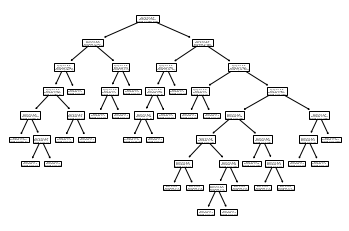

In [19]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plot_tree(tree_clf) 
plt.show()

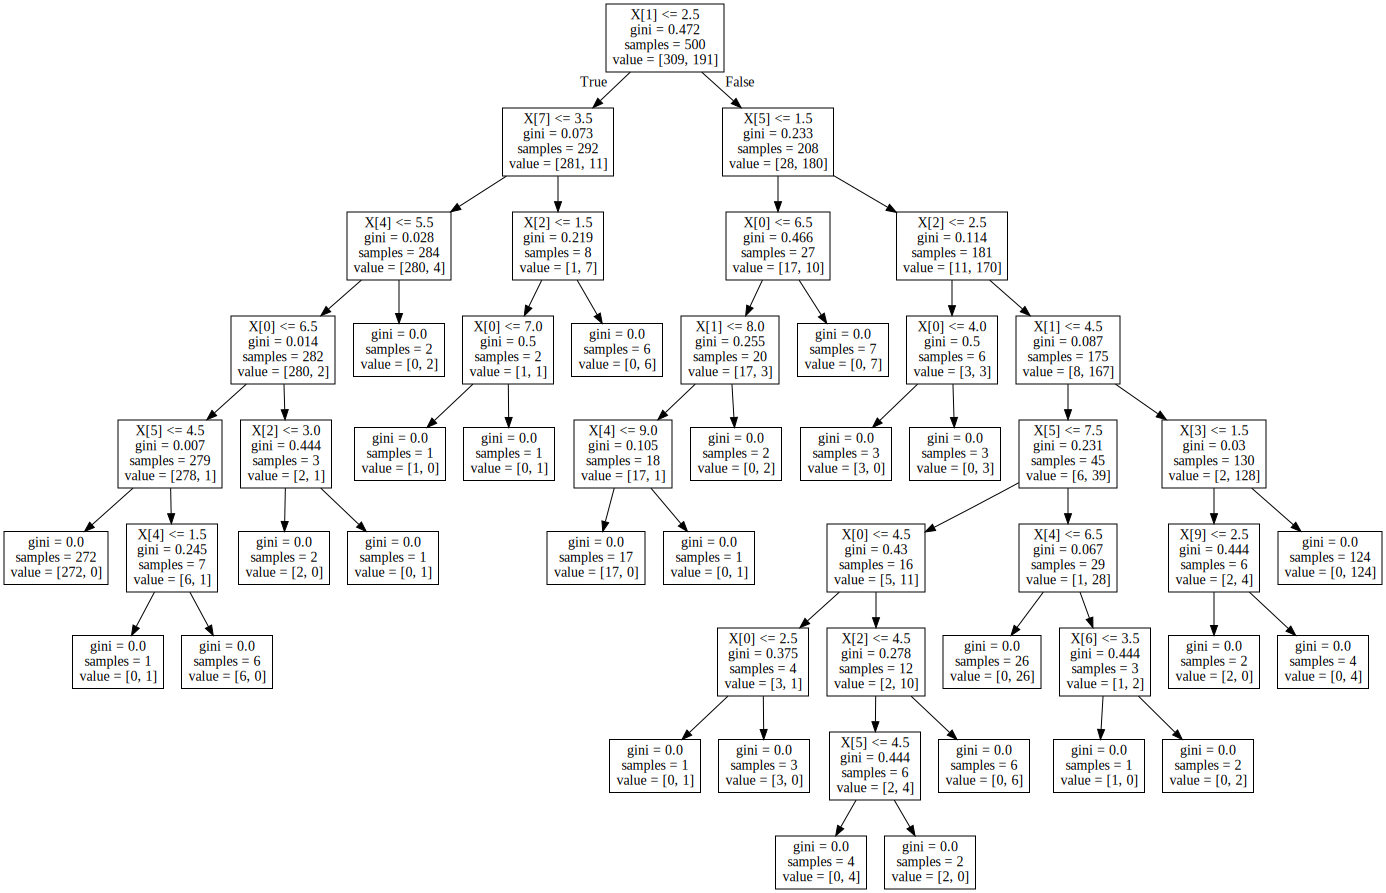

In [20]:
from sklearn.tree import export_graphviz
import graphviz 
dot_data = export_graphviz(tree_clf)
graph = graphviz.Source(dot_data)  
graph

In [21]:
dot_data = export_graphviz(tree_clf, out_file="output/tree_clf.dot")

In [22]:
#命令行下，cd至目标文件夹 dot -Tpng tree_clf.dot -o tree_clf.png

# 五、查看模型效能

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [24]:
accuracy_score(test_target,test_predict)

0.9448275862068966

In [25]:
confusion_matrix(test_target,test_predict)

array([[98,  3],
       [ 5, 39]], dtype=int64)

In [26]:
import seaborn as sns

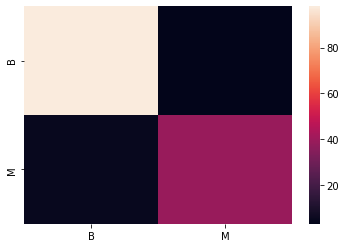

In [27]:
sns.heatmap(confusion_matrix(test_target,test_predict),
           xticklabels=['B','M'],
           yticklabels=['B','M'])

In [28]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

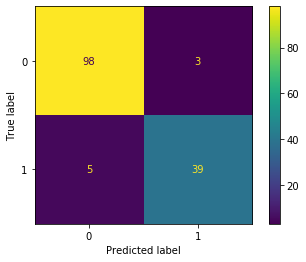

In [29]:
plot_confusion_matrix(tree_clf, test_features, test_target)

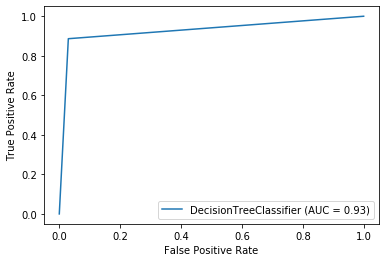

In [30]:
plot_roc_curve(tree_clf, test_features, test_target)

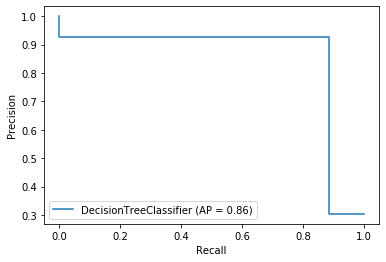

In [31]:
plot_precision_recall_curve(tree_clf, test_features, test_target)